# Studienarbeit im Fach „Datenanalyse in der Praxis“
# Thema: Daten in der Welt von eSport
# Angestrebter Abschluss: Bachelor
# MatrikelNr.: 22 19 804

# 1. Motivation
Dieser Seminararbeit basiert auf einem __[Datensatz von Kaggle mit über 9800 hochrangigen Spielen von dem berümten Spiel League of Legends](https://www.kaggle.com/datasets/bobbyscience/league-of-legends-diamond-ranked-games-10-min)__ [[1](#5-Literaturverzeichnis)]
Wenn Sie jemals League of Legends gespielt haben, wissen Sie, wie sich viele Spiele wie ein Münzwurf anfühlen, aber in den meisten Fällen können Sie tatsächlich etwas dagegen tun und gewinnen!. In dieser Arbeit wird eine explorative Datenanalyse dieses Datensatzes als auch eines benutzerdefiniertem Datensatzes durchgeführt ,um zu sehen, wie Sie (statistisch) mehr Spiele gewinnen können!.
Die Features in dem Datensatz von Kaggle werden während jedes Spiels nach 10 Minuten abgefragt.
Vor dem Reinspringen in die Welt der Datenanalyse, hier ist eine umfassende Einführung von dem Spiel 'League of Legends'
## 1.1 League of Legends
In den letzten Jahren verzeichneten Analytics-Sites von League of Legends wie op.gg, champion.gg und League of Graphs beständig zig Millionen Besuche pro Monat, die jeweils durchschnittlich 5 Minuten lang waren. Warum verbringen Spieler so viel Zeit damit, sich Statistiken und Grafiken anzusehen, wenn sie diese Zeit auch mit dem eigentlichen Spiel verbringen könnten?
Die oben genannte Frage wird im nächsten Kapitel beantwortet und gleichzeitig League of Legends und seine Datenanalysemethodik vorgestellt.
## 1.2 League of Legends verstehen
League of Legends (alias League oder LoL) ist wohl das meistgespielte Videospiel auf dem PC und der meistgesehene Esport der Welt. Seltsamerweise ist es auch ein schrecklich komplexes Spiel, bei dem zwei Gruppen von jeweils fünf Spielern in einem Kampf gegeneinander antreten.
Das Ziel des Spiels ist es, die Teambasis des Gegners zu zerstören, bevor sie Ihre zerstören. Sie spielen einen von über 140 unterschiedlichen Charakteren (bekannt als Champions), jeder mit seinen einzigartigen Fähigkeiten und Eigenschaften, die ihm unterschiedliche Vor- und Nachteile verleihen. Jede der beiden identischen Basen wird durch Anordnungen von Verteidigungsstrukturen und KI-gesteuerten Monstern (bekannt als Minions) geschützt.

| 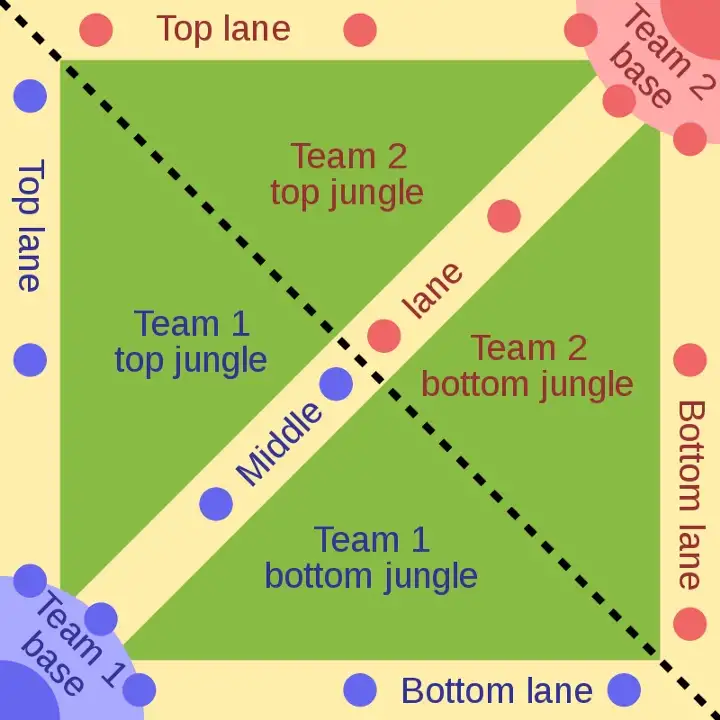 | 
|:--:| 
| *Die Karte eines League of Legends-Spiels (Quelle: __[Wikipedia](https://en.wikipedia.org/wiki/League_of_Legends)__ [[3](#5-Literaturverzeichnis)]). Wie zu sehen ist, ist die Karte symmetrisch und der Weg zur Basis des anderen Teams führt über eine von drei Spuren, wobei jede Spur von Geschütztürmen (farbige Punkte) und Vasallen verteidigt wird.* |


Die Idee ist, dass die Bemühungen jedes Teams zwischen dem Vorrücken auf die feindliche Basis und dem Stoppen ihres Vormarsches zu Ihrer aufgeteilt werden. Im Herzen jeder Basis befindet sich ein Nexus. Das Spiel endet, wenn einer der Nexus (…oder Nexii) zerstört wird. Es gibt auch neutrale Ziele, die auf der Karte verstreut sind – wenn Sie diese Ziele erreichen, werden Sie entweder stärker oder Sie erhalten Gold. Sammlen Sie genug Gold und Sie können einen von über 100 Gegenständen kaufen, die sich auf unterschiedliche Weise stärker machen.
Sind Sie verwirrt? Das gilt auch für den durchschnittlichen League of Legends-Spieler. Wenn so viele verschiedene Entscheidungen in Echtzeit getroffen werden müssen (wann verteidigen, wann/wo drängen, welche Gegenstände kaufen usw.), wird es für das menschliche Gehirn praktisch unmöglich, damit umzugehen. Dies führt dazu, dass Spieler Zeit damit verbringen, ihre Strategie zu überarbeiten, bevor das Spiel beginnt, was ihnen eine „mentale Roadmap“ gibt, der sie während des Spiels folgen können, die Anzahl der Überlegungen, die zum Treffen von Entscheidungen erforderlich sind, minimiert und ihre Gewinnchancen erhöht. So wie es aussieht, ist der Besuch von Analyseseiten eine der effizientesten Möglichkeiten, die eigene Strategie zu überarbeiten.
## 1.3 Strategie in League of Legends; Das „Meta“
League of Legends steckt voller Möglichkeiten und Entscheidungen. In einem League-Spiel gibt es für fünf Spieler pro Team Hunderte verschiedener Champions zur Auswahl, Hunderte verschiedener Gegenstände zum Kauf und mindestens drei Dinge, die Sie an einem bestimmten Punkt tun können (verteidigen, angreifen, neutrale Ziele einnehmen). Es gibt scheinbar unendlich viele Permutationen, wie ein Spiel gespielt werden könnte.
Nicht alle diese Permutationen und Entscheidungen sind jedoch realisierbar. Zum Beispiel, Wenn Sie einen Tank-Champion spielen (ein Champion, dessen Vorteil darin besteht, dass er besser Lebensfähig ist und dessen Nachteil darin besteht, relativ wenig Schaden zu verursachen), besteht der Konsens darin, dass Sie kein Gold ausgeben sollten, um Gegenstände zu kaufen, die Ihren Schaden erhöhen, sondern lieber Gegenstände kaufen, die Ihren Schaden erhöhen. Erhöhen Sie Ihre Überlebensfähigkeit weiter, indem Sie sich auf Ihren natürlichen Vorteil stützen.
Die Unterscheidung zwischen tragfähigen und nicht durchführbaren Entscheidungen rationalisiert die Strategie, sodass sie von menschlichen Köpfen zusammengestellt, diskutiert und bewertet werden kann.
Die Diskussion über Machbarkeit ist als „das Meta“ oder Metaspiel bekannt – das Spiel um das Spiel. Das von Spielern geformte Meta bestimmt, wie tragfähig eine Entscheidung ist, und hilft so, den Entscheidungsprozess der Spieler im Spiel zu fokussieren.
Ein Spiel zu spielen, das als nicht lebensfähig oder „out of meta“ gilt, ist normalerweise ein No-Go, da es Ihre Gewinnchancen senkt.
## 1.4 Analytics-Websites
League of Legends ermöglicht Entwicklern den Zugriff auf Daten früherer Spiele über eine API. Entwickler sammeln Massen von Daten aus Spielen, die von hochrangigen Spielern gespielt werden, und führen im Laufe der Zeit automatisierte Batch-Datenverarbeitungsaufträge aus, was zu statistischen Berichten führt, die in Form von Webanwendungen veröffentlicht werden. Diese Websites bieten Spielern die Möglichkeit, das Meta auf einen Blick zu bewerten.


# 2. Der Datensatz
Der Aufbau des Datensatzes ist in der [Tabelle](#3.1.2-Explorative-Datenanalyse-EDA) aus [Kapitel 3.1.2](#3.1.2-Explorative-Datenanalyse-EDA) einmal dargestellt:
Der Inhalt der verschiedenen Spalten des Datensatzes wird nachfolgend kurz erläutert. Wobei die beiden Datensätze die gleichen Spalten haben.
1. gameId

    Jedes Match erhält seine eigene ID. So können Matches, die unterschieden werden.
2. blueWins/redWins
    
    In dieser Spalte wird aufgezeigt, ob das Team eine Medaille gewann.
    - "1": Sieg für das blaue Team
    - "0": Blaues Team verliert
3. blueGoldDiff/redGoldDiff

    Die differenz an Gold, was das Team besitzt, im Gegensatz zum gegnerischen Team.
4. blueAvgLevel/redAvgLevel
    
    Durchschnittliches Niveau des Teams: von 0 bis max. 18 .
5. blueAssists/redAssists
    
    Die Anzahl von Beteilungen einzelner Spielern im Team an Kämpfe gegen das gegnerische Team.
6. blueFirstBlood/redFirstBlood
    
    Die Anzahl der ersten vergossenen/getöteten Spieler eines Spielers aus dem gegnerischen Teams
7. blueKills/redKills

    Die Anzahl der Kills, die das Team hat
    


# 3. Die Datenanalyse

## 3.1 Der Datensatz von Kaggle mit über 9800 hochrangigen Spielen

### 3.1.1 Daten- vorverarbeitung/präprozessieren 
Die Features, die das Ergebnis des Spiels am meisten beeinflussen, werden ausgwählt.

In [1]:
best_features_list = ['blueWins','blueGoldDiff','blueExperienceDiff','blueAvgLevel','redAvgLevel',
                      'redKills','blueKills','blueAssists','redAssists','blueCSPerMin','redCSPerMin',
                      'blueFirstBlood','redFirstBlood','blueEliteMonsters','redEliteMonsters',
                      'blueDragons','redDragons']

### 3.1.2 Explorative Datenanalyse EDA
Nun werden die Korrelationen des Features mit der unabhängigen Variablen mithilfe der .corr()-Methode von Pandas ermittelt.

Für die Datenanalyse insgesamt habe ich mehrere Bibliotheken verwendet:

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Zu Beginn des Skripts wurde der Datensatz aus dem lokalem Ordner eingelesen, um im weiteren Verlauf mit den 
vorhandenen Daten arbeiten zu können.


In [3]:
df = pd.read_csv(r'C:\Users\Administrator\Documents\Datenanalyse\archive\high_diamond_ranked_10min.csv')

Ausgeben des eingeladenem Datensatz, um zu sehen wie er aussieht.

In [4]:
df

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,4527873286,1,17,2,1,7,4,5,1,1,...,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,4527797466,1,54,0,0,6,4,8,1,1,...,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,4527713716,0,23,1,0,6,7,5,0,0,...,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,4527628313,0,14,4,1,2,3,3,1,1,...,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8


Mit der info() Methode können detailiertere Infos über das Datensatz bekommen werden.
In der anschließenden Datenanalyse werden viele der Spalten verwendet, allerdings 
kommen nicht alle zum Einsatz, sondern nur die, die das Spiel am meisten beinflussen. Diese wurden bereits in der Liste 'best_features_list' definiert.   

In [ ]:
df.info()

Die Korrelationen des Features mit der unabhängigen Variablen werden ermittelt.

Positive Correlations:
blueGoldDiff          0.511119
blueExperienceDiff    0.489558
blueAvgLevel          0.357820
blueKills             0.337358
blueAssists           0.276685
Name: blueWins, dtype: float64


Negative Correlations:
redAvgLevel        -0.352127
redKills           -0.339297
redAssists         -0.271047
redEliteMonsters   -0.221551
redCSPerMin        -0.212171
Name: blueWins, dtype: float64


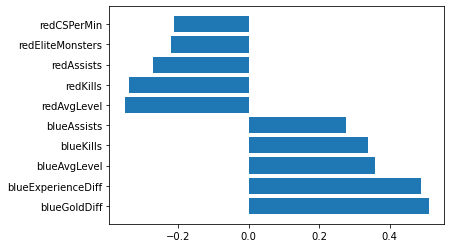

In [8]:
new_df = df[best_features_list]
corr = new_df.corr()
print('Positive Correlations:')
print(corr.loc['blueWins'].sort_values(ascending=False)[1:6])

x = corr.loc['blueWins'].sort_values(ascending=False)[1:6]
x = x[:].tolist()
print('\n')
print('Negative Correlations:')
print(corr.loc['blueWins'].sort_values(ascending=True)[:5])
y = corr.loc['blueWins'].sort_values(ascending=True)[:5]
y = y[:].tolist()
for i in y:
    x.append(i)

x = np.array(x)
y = np.array(['blueGoldDiff', 'blueExperienceDiff', 'blueAvgLevel', 'blueKills','blueAssists',
              'redAvgLevel', 'redKills', 'redAssists', 'redEliteMonsters', 'redCSPerMin'])
plt.barh(y, x)
plt.show()

Wie aus der Ausgabe zu sehen ist, zeigen die positiven Korrelationen die Merkmale, die beim Gewinnen des Spiels am wichtigsten sind (wobei blueWins = 1), und die negativen Korrelationen zeigen die Merkmale, die beim Verlieren des Spiels am wichtigsten sind (wobei blueWins = 0). Das Balkendiagramm zeigt die vorherigen Informationen aufgeräumter an.
Nach dem Anzeigen des Korrelationen, wird ein Blick auf bestimmte Merkmale geworfen, um zu sehen, wie sie sich auf das Ergebnis des Spiels auswirken.

### 3.1.3 Prozentsatz der Spiele, bei denen das blaue Team mit negativer/positiver Golddifferenz gewinnt

das erste Merkmal ist das wichtigste, weil es die höchste Korrelation aufweist, und es ist das 'blueGoldDiff', welche die Golddifferenz zwischen den beiden Teams beschreibt. Es ist das Ergebnis des gesamten Goldes des blauen Teams minus des gesamten Goldes des roten Teams.

In [9]:
AnzBlueTeamWins = sum(df['blueWins'] == 1) # Anzahl Siege des blauen Teams
P_blueGoldDiff = sum((df['blueGoldDiff'] > 0) & (df['blueWins'] == 1))  # Positiv blauGoldDiff
Pro_P_Wins = sum((df['blueGoldDiff'] > 0) & (df['blueWins'] == 1))/AnzBlueTeamWins  # Prozentsatz der Spiele, bei denen das blaue Team mit einer positiven Golddifferenz gewinnt
N_blueGoldDiff = sum((df['blueGoldDiff'] < 0) & (df['blueWins'] == 1))  # Negativ blueGoldDiff
Pro_N_Wins = sum((df['blueGoldDiff'] < 0) & (df['blueWins'] == 1))/AnzBlueTeamWins  # Prozentsatz der Spiele, bei denen das blaue Team mit einer negativen Golddifferenz gewinnt

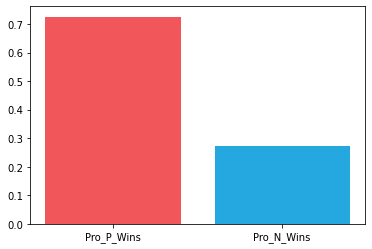

In [10]:
x = np.array(["Pro_P_Wins", "Pro_N_Wins"])
y = np.array([Pro_P_Wins, Pro_N_Wins])

plt.bar(x,y, color = ["#f1565a", "#24a8df"])
plt.show()

Wie dem vorherigen Balkendiagramm entnommen kann, gewann Team Blue etwa 72 % der Spiele, in denen es bis zur 10-Minuten-Marke einen Gold Vorsprung hatte. Dieser ist ziemlich intuitiv, denn wenn das eigene Team mehr Gold als das gegnerische Team hat, kann es Gegenstände schneller kaufen, mehr Kills erzielen und das Spielende beschleunigen. Das heißt, dass das Spiel in 72 % der Fälle gewonnen wird, wenn das eigene Team bis zur 10-Minuten-Marke einen Gold Vorsprung hat.

### 3.1.4 Durchschnittliches Level jedes Teams, wenn das blaue Team gewinnt

Dieses nächste Feature zeigt fast keinen Unterschied zwischen beiden Teams, das liegt höchstwahrscheinlich daran, dass diese Daten aus hochrangigen Spielen stammen und Spieler in höheren Rängen wissen, wie man in frühen Levels nicht zurückfällt. Nichtsdestotrotz zeigt es, dass das durchschnittliche Niveau des blauen Teams etwas höher ist als das des roten Teams.

durchschnitt blue 7.025395537525382
durchschnitt red 6.817606490872092


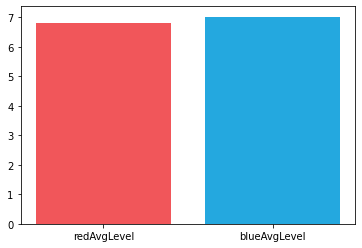

In [19]:
####################### bezüglich blue team ################
sub_df_blue = df[(df['blueAvgLevel'] >= 0) & (df['blueWins'] == 1)]
sum_of_kills = sum(sub_df_blue.iloc[:]['blueAvgLevel'])
number_of_rows = sub_df_blue.shape[0]
blueAvgLevel = sum_of_kills/number_of_rows
print("durchschnitt blue", blueAvgLevel)
######################## bezüglich red Team ####################
sub_df_red = df[(df['redAvgLevel'] >= 0) & (df['blueWins'] == 1)]
sum_of_kills = sum(sub_df_red.iloc[:]['redAvgLevel'])
number_of_rows = sub_df_red.shape[0]
redAvgLevel = sum_of_kills/number_of_rows
print("durchschnitt red", redAvgLevel)
###################### Plotten ###########################
x = np.array(["redAvgLevel", "blueAvgLevel"])
y = np.array([redAvgLevel, blueAvgLevel])

plt.bar(x,y, color = ["#f1565a", "#24a8df"])
plt.show()

### 3.1.5 Average kills for each Team when Blue Team wins

Das nächste Feature ist 'Team-Kills'. Im Durchschnitt hat das blaue Team nach 10 Minuten und in einem Spiel, in dem das blaue Team gewinnt, 7 Kills, während das rote Team (das gegnerische) 5 hat, wie im nächsten Balkendiagramm zu sehen ist. Dies knüpft an das erste Feature an, das oben bereits analysiert ist, den Goldunterschied, denn wenn ein Spieler aus dem eigenen Team jemanden im gegnerischen Team tötet, erhält das eigene Team Gold als Belohnung.

durchschnitt blue 7.201622718052739
durchschnitt red 5.1403651115618665


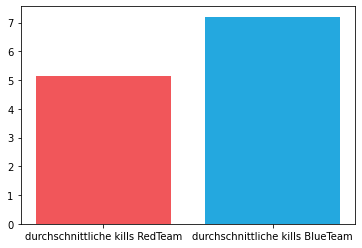

In [18]:
####################### bezüglich blue team ################
sub_df_blue = df[(df['blueKills'] >= 0) & (df['blueWins'] == 1)]
sum_of_kills = sum(sub_df_blue.iloc[:]['blueKills'])
number_of_rows = sub_df_blue.shape[0]
durchschnitt_BlueTeam = sum_of_kills/number_of_rows
print("durchschnitt blue", durchschnitt_BlueTeam)
####################### bezüglich red team ################
sub_df_red = df[(df['redKills'] >= 0) & (df['blueWins'] == 1)]
sum_of_kills = sum(sub_df_red.iloc[:]['redKills'])
number_of_rows = sub_df_red.shape[0]
durchschnitt_RedTeam = sum_of_kills/number_of_rows
print("durchschnitt red", durchschnitt_RedTeam)
###################### Plotten ###########################
x = np.array(["durchschnittliche kills RedTeam", "durchschnittliche kills BlueTeam"])
y = np.array([durchschnitt_RedTeam, durchschnitt_BlueTeam])
plt.bar(x,y, color = ["#f1565a", "#24a8df"])
plt.show()


### 3.1.6 Average assists for each team when blue Team wins

Assists (Deutsch. beteiligung) bedeuten im frühen Spiel (vor der 10-Minuten-Marke) viel, da dies bedeuten kann, dass der 'Jungler' (d.h. Ein Spieler mit bestimmter Rolle im Team) die eigenen Team Lanes (d.h. Kampffront, Kampfplatz) gankt bzw. unterstützt oder andere Lanes umherwandern (d.h. das eigene Kampffront verlassen, um eine anderes Kampffront auf der Spielkarte beizutreten, wenn Unterstützung gefragt ist). Dies ist eine gute Strategie, um Lanes zu sichern und gewinnen.

durchschnitt blue 7.771805273833672
durchschnitt red 5.559432048681542


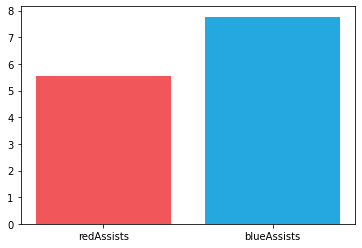

In [17]:
####################### bezüglich blue team ################
sub_df_blue = df[(df['blueAssists'] >= 0) & (df['blueWins'] == 1)]
sum_of_kills = sum(sub_df_blue.iloc[:]['blueAssists'])
number_of_rows = sub_df_blue.shape[0]
durchschnitt_BlueTeam = sum_of_kills/number_of_rows
print("durchschnitt blue", durchschnitt_BlueTeam)
####################### bezüglich red team ################
sub_df_red = df[(df['redAssists'] >= 0) & (df['blueWins'] == 1)]
sum_of_kills = sum(sub_df_red.iloc[:]['redAssists'])
number_of_rows = sub_df_red.shape[0]
durchschnitt_RedTeam = sum_of_kills/number_of_rows
print("durchschnitt red", durchschnitt_RedTeam)
###################### Plotten ###########################
x = np.array(["redAssists", "blueAssists"])
y = np.array([durchschnitt_RedTeam, durchschnitt_BlueTeam])
plt.bar(x,y, color = ["#f1565a", "#24a8df"])
plt.show()

### 3.1.7 Percentage of games where blue team wins with first blood

'First Blood' ist ein wichtiges Feature, da es das eigene Team einen frühen Vorsprung verschafft, und in den meisten Fällen muss der getötete gegnerische Team-Champion einen Beschwörerzauber wie 'Teleportation' verschwenden, um wieder auf die Lane schneller zu gelangen und möglicherweise fehlenden 'CS' (d.h. Die Kleine KI-gesteuerte  Monster töten, um Gold zu bekommen) aufzuholen.

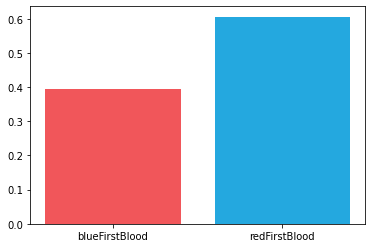

In [16]:
AnzBlueTeamWins = sum(df['blueWins'] == 1) # number of blue Team wins
P_blueGoldDiff = sum((df['blueFirstBlood'] > 0) & (df['blueWins'] == 1))  # Positive blueGoldDiff
Pro_P_Wins = P_blueGoldDiff/AnzBlueTeamWins  # precentage of games where Blue Team wins with positive gold difference
N_blueGoldDiff = sum((df['redFirstBlood'] > 0) & (df['blueWins'] == 1))  # Negative blueGoldDiff
Pro_N_Wins = N_blueGoldDiff/AnzBlueTeamWins  # precentage of games where Blue Team wins with negative
x = np.array(["blueFirstBlood", "redFirstBlood"])
y = np.array([Pro_N_Wins, Pro_P_Wins])

plt.bar(x,y, color = ["#f1565a", "#24a8df"])
plt.show()

Wenn das eigene Team 'First Blood' bekommt, hat es statistisch gesehen eine Chance von 60 %, das Spiel zu gewinnen, 10 % mehr als die Standardchance von 50 %.

### 3.1.8 Schlussfolgerung
Zusammenfassend lässt sich sagen, dass das Spiel gewonnen wird, wenn das eigene Team das meiste Gold hat, und sich Ihren Weg zum Sieg schleichen können. Es gibt mehrere Möglichkeiten, Gold-Leads zu erhalten, zum Beispiel: 'Erstes Blut' bekommen, 'Turmplatten bekommen' vermeiden, dass das gegnerische Team die eigene 'Turmplatten' bekommt, 'CSing' und vieles mehr (auf die andere Seite der Spiel-Karte zu streifen, um die 0 Kills/5 Death-Unterstützer (d.h. Ein Spieler mit bestimmter Rolle im Team) zu töten, ist es nicht einer von ihnen).

## 3.2 Benutzerdefinierte Datenanalyse
In diesem Kapitel wird nun eine ähnliche explorative- bzw. Datenanalyse wie die vorherige an einem Datensatz durchgeführt, der über die __[API von League of Legends](https://developer.riotgames.com/apis)__ [[4](#5-Literaturverzeichnis)] abgerufen wird. Der Datensatz beinhaltet die letzten 100 Spiele, die ich selber gespielt habe und die Datenanalyse dient dazu, meine eigene Spielleistung zu verbessern. Der Datensatz ist unter dem folgenden Link zu finden: __[100 League of Legends Matches](https://github.com/tyemalshara/Datenanalyse/blob/25f247f193271586731c1a193cc2e8ac6639db69/match_data100.json)__ [[2](#5-Literaturverzeichnis)]

Der Datensatz hätte ich auch mittels Webscraping Techniken aus der Analytics-Websites wie z.B. 'op.gg' bekommen können. Jedoch bevorzugte ich den Datensatz über die API von LoL zu bekommen.
Der Datensatz wurde über die API als JSON-Datei zurückgegeben für nur ein Spiel. Da ich aber einen Datensatz von 100 Spielen brauche, habe ich über einer Schleife die Request über die API 100 mal ausgeeführt. Und so habe ich ein JSON-Datei mit mehreren JSON-Objekte drin, die ich mit Kommas trennen musste und mit eckige Klammer am Anfang als auch am Ende verpacken. Ansonsten gäbe es Probleme wenn ich die JSON-Datei einladen wollte.
Im anschließenden Code habe ich das Team mit dem Ich gespielt habe als Blue Team bezeichnet. Die wichtige Features habe ich dann aus dem JSON-Datei geparst. Anschließend habe ich die geparste Features mit einem schönen DataFrame von Pandas visualisiert.

In [1]:
import json
import pandas as pd

studentsList = []
blueteamId = 0
# print("Started Reading JSON file which contains multiple JSON document")
with open('match_data100.json') as f:
    for jsonObj in f:
        studentDict = json.loads(jsonObj)
        studentsList.append(studentDict)
data = []
[studentsList] = studentsList   # remove-the-outer-list-of-a-double-list [[]] -> []
for student in studentsList:
    mydict = {}
    BlueTeam_assists = 0
    RedTeam_assists = 0
    BlueTeam_goldEarned = 0
    RedTeam_goldEarned = 0
    BlueTeam_championLevel = 0 
    RedTeam_championLevel = 0
    gameId = student['info']['gameId']
    for participant in student['info']['participants']:
        if participant['summonerName']=='Timoschka17':
            # get teamId since we need to know the team that Timoschka belongs to and based on that Timoschka's team is gonna be the Blue Team
            blueteamId = participant['teamId']
    for participant in student['info']['participants']: # get blue/red team total assists
        if participant["teamId"] == blueteamId & participant["teamId"] != 0:
            # Add the participant's assists to the BlueTeam assists
            BlueTeam_assists += participant['assists']    
        if participant["teamId"] != blueteamId & participant["teamId"] != 0:
            # Add the participant's assists to the RedTeam assists
            RedTeam_assists += participant['assists']
    for participant in student['info']['participants']: # get blue/red team total gold earned
        if participant["teamId"] == blueteamId & participant["teamId"] != 0:
            # Add the participant's total gold to the BlueTeam total gold
            BlueTeam_goldEarned += participant['goldEarned']
            
        if participant["teamId"] != blueteamId & participant["teamId"] != 0:
            # Add the participant's total gold to the RedTeam total gold
            RedTeam_goldEarned += participant['goldEarned']         
    redGoldDiff = RedTeam_goldEarned - BlueTeam_goldEarned
    blueGoldDiff = BlueTeam_goldEarned - RedTeam_goldEarned
    for participant in student['info']['participants']: # get blue/red team Average level
        if participant["teamId"] == blueteamId & participant["teamId"] != 0:
            # Add the participant's Average level to the BlueTeam Average level
            BlueTeam_championLevel += participant['champLevel']
        if participant["teamId"] != blueteamId & participant["teamId"] != 0:
            # Add the participant's Average level to the RedTeam Average level
            RedTeam_championLevel += participant['champLevel']
    BlueTeam_AvgLevel = BlueTeam_championLevel/5
    RedTeam_AvgLevel = RedTeam_championLevel/5
    for team in student['info']['teams']:        
        if team['teamId']==blueteamId:
            # get champkills of the team with the corresponding teamId. if teamId == teamId of Timoschka, then champkills are the Blue team champion kills
            BlueteamKills = team['objectives']['champion']['kills']
            BlueTeamfirstblood = team['objectives']['champion']['first']
            if BlueTeamfirstblood == False: # represent False to be 0 nad True to be 1
                BlueTeamfirstblood = 0
            if BlueTeamfirstblood == True:
                BlueTeamfirstblood = 1
            BlueTeamWin = team['win']   # ersetzen mit '0' anstatt 'false/true' für blueWins
            if BlueTeamWin == False:
                BlueTeamWin = 0
            if BlueTeamWin == True:
                BlueTeamWin = 1
        else:
            RedteamKills = team['objectives']['champion']['kills']
            RedTeamfirstblood = team['objectives']['champion']['first']
            if RedTeamfirstblood == False:
                RedTeamfirstblood = 0
            if RedTeamfirstblood == True:
                RedTeamfirstblood = 1
            RedTeamWin = team['win']
    # Add the key/value of fields of interests to the 'mydict' dict
    mydict['gameId'] = gameId
    mydict['blueWins'] = BlueTeamWin
    mydict['blueFirstBlood'] = BlueTeamfirstblood
    mydict['blueKills'] = BlueteamKills
    mydict['blueAssists'] = BlueTeam_assists
    mydict['blueTotalGold'] = BlueTeam_goldEarned
    mydict['blueAvgLevel'] = BlueTeam_AvgLevel
    mydict['blueGoldDiff'] = blueGoldDiff
    
    mydict['redFirstBlood'] = RedTeamfirstblood
    mydict['redKills'] = RedteamKills
    mydict['redAssists'] = RedTeam_assists
    mydict['redTotalGold'] = RedTeam_goldEarned
    mydict['redAvgLevel'] = RedTeam_AvgLevel    
    mydict['redGoldDiff'] = redGoldDiff
    
    data.append(mydict) # Add the 'mydict' dict to the 'data' list

# Create a dataframe from the list of dictionaries
df = pd.DataFrame(data)
# Print the dataframe
df

,gameId,blueWins,blueFirstBlood,blueKills,blueAssists,blueTotalGold,blueAvgLevel,blueGoldDiff,redFirstBlood,redKills,redAssists,redTotalGold,redAvgLevel,redGoldDiff
0,6220416153,1,1,32,33,58655,14.6,9399,0,26,40,49256,13.8,-9399
1,6219028255,1,1,61,83,77294,17.2,4287,0,48,45,73007,16.8,-4287
2,6218983705,1,1,30,39,43830,12.6,9226,0,8,10,34604,11.2,-9226
3,6217814471,1,1,40,46,66033,15.4,2992,0,39,58,63041,16.2,-2992
4,6217739041,0,1,40,61,62849,15.2,-4139,0,37,62,66988,15.6,4139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,5476449769,0,0,18,20,40177,12.6,-17484,1,37,43,57661,14.0,17484
95,5476089924,0,1,42,47,93405,17.6,466,0,62,76,92939,16.2,-466
96,5475989765,0,0,30,35,81911,17.4,-12937,1,53,83,94848,18.0,12937
97,5476020888,1,0,43,57,64641,16.6,5618,1,31,28,59023,15.4,-5618


Der Datensatz enthält Informationen von 100 League of Legends Spielen, die ich in letzter Zeit gespielt habe. 

In [2]:
best_features_list = list(df) # Holen einer Liste aller Spaltennamen in Pandas DataFrame
best_features_list

['gameId',
 'blueWins',
 'blueFirstBlood',
 'blueKills',
 'blueAssists',
 'blueTotalGold',
 'blueAvgLevel',
 'blueGoldDiff',
 'redFirstBlood',
 'redKills',
 'redAssists',
 'redTotalGold',
 'redAvgLevel',
 'redGoldDiff']

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gameId          99 non-null     int64  
 1   blueWins        99 non-null     int64  
 2   blueFirstBlood  99 non-null     int64  
 3   blueKills       99 non-null     int64  
 4   blueAssists     99 non-null     int64  
 5   blueTotalGold   99 non-null     int64  
 6   blueAvgLevel    99 non-null     float64
 7   blueGoldDiff    99 non-null     int64  
 8   redFirstBlood   99 non-null     int64  
 9   redKills        99 non-null     int64  
 10  redAssists      99 non-null     int64  
 11  redTotalGold    99 non-null     int64  
 12  redAvgLevel     99 non-null     float64
 13  redGoldDiff     99 non-null     int64  
dtypes: float64(2), int64(12)
memory usage: 11.0 KB


Der Gleiche Prozess, wie bei dem Datensatz von Kaggle, wird durchgeführt

Positive Correlations:
blueGoldDiff      0.867394
blueKills         0.370406
blueAssists       0.295740
blueFirstBlood    0.291515
blueTotalGold     0.139480
Name: blueWins, dtype: float64


Negative Correlations:
redGoldDiff     -0.867394
redAssists      -0.409821
redKills        -0.383829
redTotalGold    -0.283282
redFirstBlood   -0.217892
Name: blueWins, dtype: float64


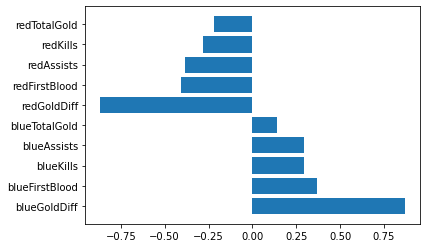

In [6]:
new_df = df[best_features_list]
corr = new_df.corr()
print('Positive Correlations:')
print(corr.loc['blueWins'].sort_values(ascending=False)[1:6])

x = corr.loc['blueWins'].sort_values(ascending=False)[1:6]
x = x[:].tolist()
print('\n')
print('Negative Correlations:')
print(corr.loc['blueWins'].sort_values(ascending=True)[:5])
y = corr.loc['blueWins'].sort_values(ascending=True)[:5]
y = y[:].tolist()
for i in y:
    x.append(i)

x = np.array(x)
y = np.array(['blueGoldDiff','blueFirstBlood','blueKills','blueAssists','blueTotalGold',
              'redGoldDiff','redFirstBlood','redAssists','redKills','redTotalGold'])
plt.barh(y, x)
plt.show()

Wie aus der Ausgabe zu sehen ist, zeigen die positiven Korrelationen die Merkmale, die beim Gewinnen des Spiels am wichtigsten sind, und die negativen Korrelationen zeigen die Merkmale, die beim Verlieren des Spiels am wichtigsten sind. Wobei einer, der positiven Korrelationen die 'BlueGoldDiff' zeigt eine schwerwiegende (wichtige) Bedeutung und ist ein Erfolgsfaktor zum Gewinnen des Spiels. 
Zunächst wird ein Blick auf bestimmte Merkmale geworfen, um zu sehen, wie sie sich auf das Ergebnis des Spiels auswirken.

In [13]:
AnzBlueTeamWins = sum(df['blueWins'] == 1) # Anzahl Siege des blauen Teams
P_blueGoldDiff = sum((df['blueGoldDiff'] > 0) & (df['blueWins'] == 1))  # Positiv blauGoldDiff
Pro_P_Wins = sum((df['blueGoldDiff'] > 0) & (df['blueWins'] == 1))/AnzBlueTeamWins  # Prozentsatz der Spiele, bei denen das blaue Team mit einer positiven Golddifferenz gewinnt
N_blueGoldDiff = sum((df['blueGoldDiff'] < 0) & (df['blueWins'] == 1))  # Negativ blueGoldDiff
Pro_N_Wins = sum((df['blueGoldDiff'] < 0) & (df['blueWins'] == 1))/AnzBlueTeamWins  # Prozentsatz der Spiele, bei denen das blaue Team mit einer negativen Golddifferenz gewinnt

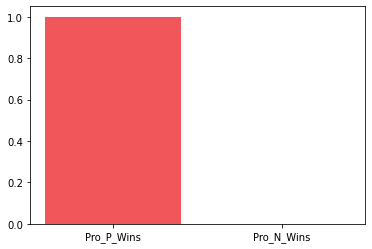

In [14]:
x = np.array(["Pro_P_Wins", "Pro_N_Wins"])
y = np.array([Pro_P_Wins, Pro_N_Wins])

plt.bar(x,y, color = ["#f1565a", "#24a8df"])
plt.show()

Wie man aus dem Balkendiagramm entnehmen kann, habe ich 100% der Spiele, wo ich Gold Vorsprung hatte, gewonnen!

durchschnitt blue 14.844444444444447
durchschnitt red 13.644444444444442


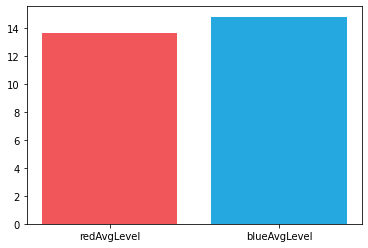

In [9]:
####################### bezüglich blue team ################
sub_df_blue = df[(df['blueAvgLevel'] >= 0) & (df['blueWins'] == 1)]
sum_of_kills = sum(sub_df_blue.iloc[:]['blueAvgLevel'])
number_of_rows = sub_df_blue.shape[0]
blueAvgLevel = sum_of_kills/number_of_rows
print("durchschnitt blue", blueAvgLevel)
######################## bezüglich red Team ####################
sub_df_red = df[(df['redAvgLevel'] >= 0) & (df['blueWins'] == 1)]
sum_of_kills = sum(sub_df_red.iloc[:]['redAvgLevel'])
number_of_rows = sub_df_red.shape[0]
redAvgLevel = sum_of_kills/number_of_rows
print("durchschnitt red", redAvgLevel)
###################### Plotten ###########################
x = np.array(["redAvgLevel", "blueAvgLevel"])
y = np.array([redAvgLevel, blueAvgLevel])

plt.bar(x,y, color = ["#f1565a", "#24a8df"])
plt.show()

Aus dem Balkendiargramm kann festgestellt werden, dass mein Team(blau) als auch das gegnerische Team(Rot) gleichmäßig das Spiel gewonnen haben, wobei die beiden Teams ein Level von ~14 erreicht haben. Das lässt sich begründen, dass niedrigrangige Spielern(ich) das Lead nicht rechtzeitig ausnutzen, und dass das Team nicht über eine gute Kommunikative bzw. Koordinative fähigkeiten verfügt, um einen guten Kampf gegen dem gegnerischen Team einzusetzen, um den Gewinn zu sichern.


durchschnitt blue 39.13333333333333
durchschnitt red 25.955555555555556


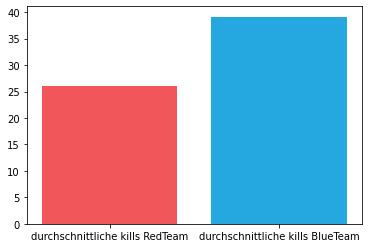

In [10]:
####################### bezüglich blue team ################
sub_df_blue = df[(df['blueKills'] >= 0) & (df['blueWins'] == 1)]
sum_of_kills = sum(sub_df_blue.iloc[:]['blueKills'])
number_of_rows = sub_df_blue.shape[0]
durchschnitt_BlueTeam = sum_of_kills/number_of_rows
print("durchschnitt blue", durchschnitt_BlueTeam)
####################### bezüglich red team ################
sub_df_red = df[(df['redKills'] >= 0) & (df['blueWins'] == 1)]
sum_of_kills = sum(sub_df_red.iloc[:]['redKills'])
number_of_rows = sub_df_red.shape[0]
durchschnitt_RedTeam = sum_of_kills/number_of_rows
print("durchschnitt red", durchschnitt_RedTeam)
###################### Plotten ###########################
x = np.array(["durchschnittliche kills RedTeam", "durchschnittliche kills BlueTeam"])
y = np.array([durchschnitt_RedTeam, durchschnitt_BlueTeam])
plt.bar(x,y, color = ["#f1565a", "#24a8df"])
plt.show()


Das eigene Team ist mit 7 kills besser als das Rote Team, denn ein Ace(d.h. 5 kills) ist notwendig, um das spiel zu gewinnen, wobei die 2 verbleibenden Kills Catches (Ein bis drei Mitglieder des gegnerischen Teams zu töten. Meistens sind solche Tötungen möglich gewesen, wenn sich der Gegner am falschen Ort/Zeitpunkt befindet, und einfach zu töten ist) sein können, die vor dem Erzielen des Ace's stattgefunden hat.

durchschnitt blue 46.91111111111111
durchschnitt red 30.866666666666667


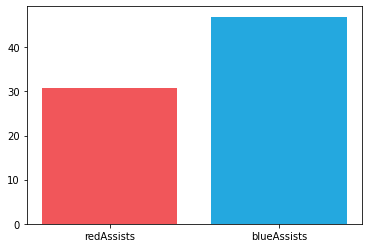

In [11]:
####################### bezüglich blue team ################
sub_df_blue = df[(df['blueAssists'] >= 0) & (df['blueWins'] == 1)]
sum_of_kills = sum(sub_df_blue.iloc[:]['blueAssists'])
number_of_rows = sub_df_blue.shape[0]
durchschnitt_BlueTeam = sum_of_kills/number_of_rows
print("durchschnitt blue", durchschnitt_BlueTeam)
####################### bezüglich red team ################
sub_df_red = df[(df['redAssists'] >= 0) & (df['blueWins'] == 1)]
sum_of_kills = sum(sub_df_red.iloc[:]['redAssists'])
number_of_rows = sub_df_red.shape[0]
durchschnitt_RedTeam = sum_of_kills/number_of_rows
print("durchschnitt red", durchschnitt_RedTeam)
###################### Plotten ###########################
x = np.array(["redAssists", "blueAssists"])
y = np.array([durchschnitt_RedTeam, durchschnitt_BlueTeam])
plt.bar(x,y, color = ["#f1565a", "#24a8df"])
plt.show()

Aus dem Balkendiargramm kann festgestellt werden, dass mein Team(blau), was wesentlich mehr Assists hat als das gegnerische Team(Rot), gewinnt. Das heißt, dass Assists eine wichtige Rolle spielt. Ein Team soll meistens zusammen kämpfen um die Chance an gewinnen zu erhöhen.

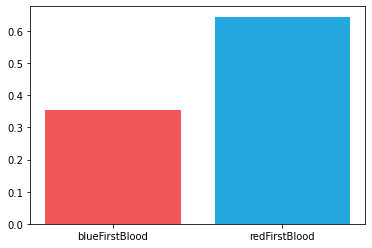

In [12]:
AnzBlueTeamWins = sum(df['blueWins'] == 1) # number of blue Team wins
P_blueGoldDiff = sum((df['blueFirstBlood'] > 0) & (df['blueWins'] == 1))  # Positive blueGoldDiff
Pro_P_Wins = P_blueGoldDiff/AnzBlueTeamWins  # precentage of games where Blue Team wins with positive gold difference
N_blueGoldDiff = sum((df['redFirstBlood'] > 0) & (df['blueWins'] == 1))  # Negative blueGoldDiff
Pro_N_Wins = N_blueGoldDiff/AnzBlueTeamWins  # precentage of games where Blue Team wins with negative
x = np.array(["blueFirstBlood", "redFirstBlood"])
y = np.array([Pro_N_Wins, Pro_P_Wins])

plt.bar(x,y, color = ["#f1565a", "#24a8df"])
plt.show()

Aus dem Balkendiargramm kann festgestellt werden, dass mein Team(blau), was wesentlich mehr Firstblood hat als das gegnerische Team(Rot), gewinnt. Das heißt, dass Firstblood eine wichtige Rolle spielt, um die Chance an gewinnen zu erhöhen.

# 4 Fazit
Zusammenfassend lässt sich sagen, dass jeder das Spiel gewinnen kann, wenn das Team das meiste Gold hat, und kommuikativ sowie koordiniert sein muss um den Sieg sichern zu können.
Mit den gut aufbereiteten und vielfältigen Datensätze machte die Auswertung 
Spaß und ich konnte einige neue Einsatztechniken für die Datenanalyse sowie auch erfolgsführende Strategien meines favoriten Spiels lernen. 
Es ist interessant zu sehen, dass sich die hoch- und niedrigrangige Spiele feine unterschiedliche Strategien zum vorrangehen erfordert, um das Gewinn zu sichern 
Meine Ideen für die Analysen sind mir alle spontan und bei der Auseinandersetzung mit den Daten eingefallen. 
Der Datensatz, die man über die API bekommt, ist sehr komplex und beinhaltet jedes einzige Detail und Ereignis, das im Laufe des Spiels stattfindet, jedoch habe ich die Analysen einfach eingehalten, weil nicht jeder das berühmte Spiel spielt bzw. kennt, und schnell nicht verständlich sein kann. Ich hoffe, ich konnte mit der Anaylse zeigen, wie wichtig Daten sein können. Spieler lernen daraus vieles, um eine Strategie zu entwickeln.
Des Weiteren verwendete ich in dieser Studienarbeit bewusst regelmäßig die „Ich“-Perspektive, um meine Gedankengänge besser schildern, und sich meine Mitspieler angesprochen fühlen zu können.

# 5 Literaturverzeichnis
[1] "www.kaggle.com," [online]. Available:https://www.kaggle.com/datasets/bobbyscience/league-of-legends-diamond-ranked-games-10-min . [Zugriff am 01 November 2022]

[2] "www.github.com" [online]. Available:https://github.com/tyemalshara/Datenanalyse/blob/8a5cb99a84f20b22b73cf1ff74396aaeaf5cd5de/match_data100.json . [Zugriff am 10 Januar 2023]

[3] "en.wikipedia.org," [online]. Available:https://en.wikipedia.org/wiki/League_of_Legends . [Zugriff am 01 November 2022]

[4] "developer.riotgames.com," [online]. Available:https://developer.riotgames.com/apis . [Zugriff am 01 Januar 2023]